In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=20, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=17, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=144, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('panda', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


/home/juju/anaconda3/envs/mmpose/lib/python3.8/site-packages/scipy/__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9008 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"1968f25b-5cf1-4999-b72f-b7117b2f08d8" --shell=9007 --transport="tcp" --iopub=9009 --f=/home/juju/.local/share/jupyter/runtime/kernel-v2-20913UZsHELgTgx1L.json


*********************** Logical States ***********************
OrderedDict([('Candle0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('Canister0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('bottle0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=Candle0, pos=[0.5769371  0.02970544 0.81030546]),
                           Object(name=Canister0, pos=[ 0.53228192 -0.03693814  0.97859782]),
                           Ob

In [2]:
# in pc_utils
pc, pc_segments, pc_color, count = pc_utils.get_obj_point_clouds(
                            rearrangement1.init_scene,
                            mcts.rearr_action.scene_mngr.scene,
                            mcts.tree.nodes[0]
                            )

table_point_cloud, table_color =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)

# in pc_utils
all_pc = np.vstack([pc, table_point_cloud])
all_color = np.vstack([pc_color, table_color])

# fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# mcts.rearr_action.scene_mngr.render_objects(ax)
# p_utils.plot_basis(ax)
# mcts.rearr_action.show()

mcts.rearr_action.scene_mngr.scene.objs


##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

# table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)
# all_pc = np.vstack([combined_pc, table_point_cloud])

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# print(obj_to_manipulate)
# print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])

#################### 
# 포인트 클라우드를 렌더링
colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)
pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
scene = trimesh.Scene(pc_full)

# Set point size and color
scene.point_size = 5.0  # Increase point size to make them more visible

# Show the scene
scene.show()

NameError: name 'mcts' is not defined

In [4]:
mcts.init_scene.

In [11]:
c = 3.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
        use_pick_action=False,
        do_level_2 = False,
    )
mcts.only_optimize_1 = True
mcts._do_level_2 = False

/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-08-18 21:27:01.531867: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-18 21:27:01.531964: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-18 21:27:01.532034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-18 21:27:01.532085: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-18 21:27:01.532150: I tensorflow/core/common

In [14]:
start_time = time.time()
for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 3.5, Seed: 17
=========== Search iteration : 1 ===========
[Action] Rearr Canister0 to table
placed another place not goal
[Reward] S(0) -> A(3) -> S'(298) Reward : -1
[Action] Rearr Candle0 to table
placed another place not goal
[Reward] S(298) -> A(299) -> S'(1770) Reward : -1
[Action] Rearr Canister0 to table
placed another place not goal
[Reward] S(1770) -> A(1771) -> S'(1782) Reward : -1
[Action] Rearr bottle0 to table
Good Action
[Reward] S(1782) -> A(1788) -> S'(1794) Reward : 1.25
[Action] Rearr Candle0 to table
Good Action
[Reward] S(1794) -> A(1796) -> S'(1805) Reward : 1.0
[Action] Rearr milk0 to table
placed another place not goal
[Reward] S(1805) -> A(1813) -> S'(1816) Reward : -1
[Action] Rearr Canister0 to table
placed another place not goal
[Reward] S(1816) -> A(1818) -> S'(1827) Reward : -1
[Action] Rearr Candle0 to table
Bad Action
[Reward] S(1827) -> A(1828) -> S'(1838) Reward : -0.625
[Action] Rearr can0 to table
Good Acti

In [16]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
#     mcts.render_rearr("_", max_value_nodes)

5.763888888888888 {}


In [ ]:
mcts.history_level_1_dict

{0: {'nodes': [0, 2, 106, 107, 109, 115, 116, 118, 123, 125, 129, 132, 134],
  'value': 7.197619047619048},
 1: {'nodes': [0,
   4,
   135,
   136,
   141,
   143,
   148,
   150,
   153,
   157,
   158,
   159,
   162,
   165,
   166,
   170,
   171,
   173,
   176,
   180,
   181],
  'value': 4.412878787878789}}

In [7]:
mcts.history_level_2_dict

{}

In [10]:
mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk(), mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose()

({'right_hand': array([[-4.91581000e-04,  9.97857965e-01,  6.54159049e-02,
           3.69271925e-01],
         [ 9.99999879e-01,  4.92636185e-04, -9.45645645e-12,
          -3.00144311e-12],
         [-3.22262512e-05,  6.54158969e-02, -9.97858086e-01,
           1.31586539e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           1.00000000e+00]]),
  'right_gripper': array([[-4.91581000e-04,  9.97857965e-01,  6.54159049e-02,
           3.69271925e-01],
         [ 9.99999879e-01,  4.92636185e-04, -9.45645784e-12,
          -3.00144311e-12],
         [-3.22262512e-05,  6.54158969e-02, -9.97858086e-01,
           1.31586539e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           1.00000000e+00]]),
  'leftfinger': array([[-4.91581000e-04,  9.97857965e-01,  6.54159049e-02,
           4.12614037e-01],
         [ 9.99999879e-01,  4.92636185e-04, -9.45647033e-12,
           1.97043721e-05],
         [-3.22262512e-05,  6.54158969e-02, -9.97858086e-01,


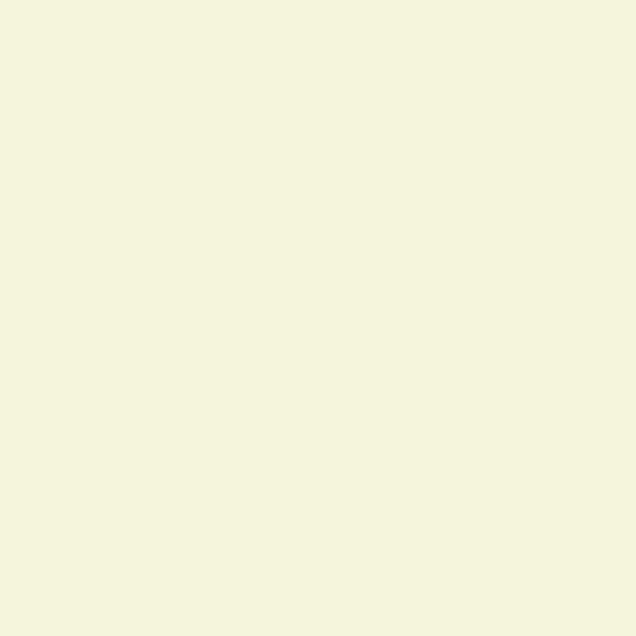

In [12]:

fig, ax = p_utils.init_3d_figure(name="Level wise 1")

i = 0
for i in range(len(max_value_nodes)//2):
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[max_value_nodes[2*(i)+1]]['state'])

    grasp = mcts.tree.nodes[max_value_nodes[2*(i)+1]]['grasp_set'][0]
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)


    gripper_kinematics_info = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk()

    gripper_tip_poses = mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose()


    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['leftfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['rightfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['rightfinger']))
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['leftfinger']))

    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

check grasp quality

In [10]:
if 'grasp_poses' in mcts.tree.nodes[2]:
    print(1)

In [17]:
if not mcts.tree.nodes[263].get('joints'):
    print(1)

1


In [26]:
mcts.tree.nodes[266]

{'depth': 2,
 'state': <pytamp.scene.scene.Scene at 0x7f9ee8286d30>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'bottle0',
  'place_obj_name': 'table',
  'rearr_poses': [{'table': array([[-0.84669407,  0.53208002,  0.        ,  0.41998304],
           [-0.53208002, -0.84669407,  0.        , -0.12788834],
           [ 0.        ,  0.        ,  1.        ,  0.87515735],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}]},
 'value': 9.3,
 'value_history': [9.3,
  -8.97027417027417,
  -14.02222222222222,
  -10.129004329004328,
  -7.379365079365078,
  -7.383333333333333,
  9.3,
  9.3,
  -13.390909090909089],
 'visit': 9,
 'number': 266,
 'type': 'action',
 'joints': [],
 'level1': True,
 'level2': True,
 'level1_5': True,
 'success': True,
 'cost': 0,
 'test': (),
 'grasp_set': array([[[ 0.74535776, -0.5487327 , -0.37859504,  0.65497459],
         [-0.55171698, -0.8265112 ,  0.11174788, -0.32537151],
         [-0.37423277,  0.12558518, -0.9187917 ,  1.05983627],
     

TypeError: string indices must be integers

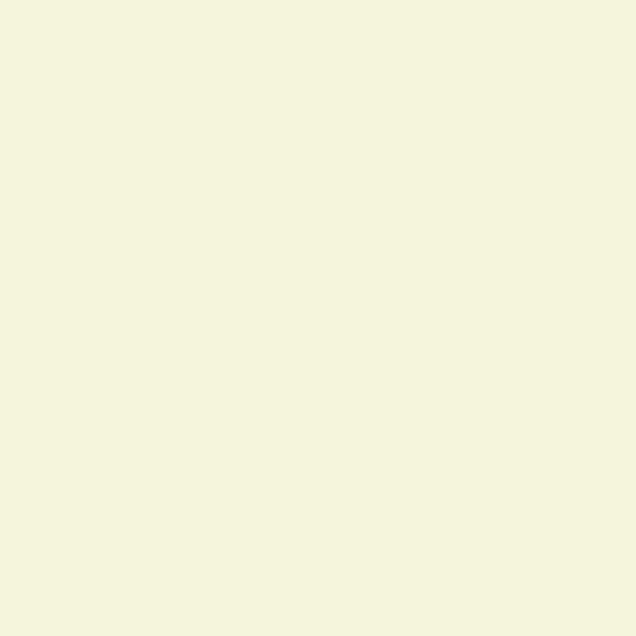

In [13]:
nodes_ = mcts.history_level_1_dict[1]['nodes']

fig, ax = p_utils.init_3d_figure(name="Level wise 1")

i = 0
mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes_[2*(i)+1]]['state'])


grasps = mcts.tree.nodes[nodes_[2*(i)+1]]

for grasp in grasps :
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    mcts.rearr_action.scene_mngr.render_axis(ax, grasp)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

# Make Contact_graspNet's GraspEstimator

In [14]:
# import os
# import sys
# import argparse
# import numpy as np
# import time
# import glob
# import cv2

# import tensorflow.compat.v1 as tf
# tf.disable_eager_execution()
# physical_devices = tf.config.list_physical_devices('GPU')

# if physical_devices:
#     try:
#         tf.config.experimental.set_virtual_device_configuration(
#                     physical_devices[0],
#                     [tf.config.LogicalDeviceConfiguration(memory_limit=6000)])  # 4GB 제한
#     except  RuntimeError as e:
#         print(e)

# home_path = os.path.expanduser('~')
# sys.path.append(os.path.join(home_path , 'contact_graspnet/contact_graspnet'))

# import config_utils
# from data import regularize_pc_point_count, depth2pc, load_available_input_data
# from contact_graspnet import contact_graspnet
# from contact_grasp_estimator import GraspEstimator
from visualization_utils import visualize_grasps, show_image

# parser = argparse.ArgumentParser()
# parser.add_argument('--ckpt_dir', default='checkpoints/scene_test_2048_bs3_hor_sigma_001', help='Log dir [default: checkpoints/scene_test_2048_bs3_hor_sigma_001]')
# parser.add_argument('--np_path', default='test_data/7.npy', help='Input data: npz/npy file with keys either "depth" & camera matrix "K" or just point cloud "pc" in meters. Optionally, a 2D "segmap"')
# parser.add_argument('--png_path', default='', help='Input data: depth map png in meters')
# parser.add_argument('--K', default=None, help='Flat Camera Matrix, pass as "[fx, 0, cx, 0, fy, cy, 0, 0 ,1]"')
# parser.add_argument('--z_range', default=[0.2,1.8], help='Z value threshold to crop the input point cloud')
# parser.add_argument('--local_regions', action='store_true', default=False, help='Crop 3D local regions around given segments.')
# parser.add_argument('--filter_grasps', action='store_true', default=False,  help='Filter grasp contacts according to segmap.')
# parser.add_argument('--skip_border_objects', action='store_true', default=False,  help='When extracting local_regions, ignore segments at depth map boundary.')
# parser.add_argument('--forward_passes', type=int, default=1,  help='Run multiple parallel forward passes to mesh_utils more potential contact points.')
# parser.add_argument('--segmap_id', type=int, default=0,  help='Only return grasps of the given object id')
# parser.add_argument('--arg_configs', nargs="*", type=str, default=[], help='overwrite config parameters')

# FLAGS = parser.parse_args(args=[])

# global_config = config_utils.load_config(FLAGS.ckpt_dir, batch_size=FLAGS.forward_passes, arg_configs=FLAGS.arg_configs)

# ## Config를 받아서 GraspEstimatorr Class를 받아옴. 
# grasp_estimator = GraspEstimator(global_config)


# Make Network 

In [15]:
# grasp_estimator.build_network()


# # Add ops to save and restore all the variables.
# saver = tf.train.Saver(save_relative_paths=True)

# # Create a session
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# config.allow_soft_placement = True
# sess = tf.Session(config=config)


In [16]:
# checkpoint_dir = '/home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/'

# # Load weights
# # grasp_estimator.load_weights(sess, saver, checkpoint_dir, mode='test')
# saver.restore(sess, '/home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144')

# Get point cloud 

old한 방법임. 아래 synthetic scene에서 더 간단하게 get함. 

In [17]:
# # max_value_nodes = mcts.history_level_1_optimal_nodes[1]
# state_list = [i for _, i in enumerate(max_value_nodes) if not _ % 2]
# action_list = [i for _, i in enumerate(max_value_nodes) if _ % 2]

# for i in range(len(max_value_nodes)//2):
# #     print("current state : ", max_value_nodes[2*i])
# #     print("action : ", max_value_nodes[2*i + 1])
# #     print("next state : ", max_value_nodes[2*(i+1)])
    
#     print("manipulate object", mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])
#     current_state_pc, current_pc_segments, current_pc_color, current_count = pc_utils.get_obj_point_clouds(
#                                 rearrangement1.init_scene,
#                                 mcts.tree.nodes[max_value_nodes[2*i]]['state'],
#                                 mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
#                                 )
#     next_state_pc, next_pc_segments, next_pc_color,  next_count = pc_utils.get_obj_point_clouds(
#                                 rearrangement1.init_scene,
#                                 mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
#                                 mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
#                                 )
    
#     print()
    
#     if i==3:
#         break

# obj_to_manipulate = mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
# obj_to_manipulate

In [18]:
# table_point_cloud, table_color =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)

# all_color = np.vstack([current_pc_color, next_pc_color])
# all_color = np.vstack([all_color, table_color])
# all_color = np.vstack([all_color, table_color])


# current_state_pc = np.vstack([current_state_pc, table_point_cloud])
# next_state_pc = np.vstack([next_state_pc, table_point_cloud])

# obj_to_manipulate = mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
# combined_pc = pc_utils.get_combined_point_cloud(mcts.tree.nodes[max_value_nodes[2*i]]['state'],
#                                         mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
#                                         obj_to_manipulate,
#                                         current_state_pc,
#                                         next_state_pc,
#                                         next_count
#                                        )


# mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']

In [19]:
# ##### %matplotlib inline
# import trimesh
# from trimesh.util import concatenate

# # table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)
# # all_pc = np.vstack([combined_pc, table_point_cloud])


# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# print(len(next_state_pc))
# print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])

# #################### 
# # 포인트 클라우드를 렌더링
# colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)

# all_pc, shift_xy, cTn = combined_pc

# pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
# scene = trimesh.Scene(pc_full)
# # Set the camera viewpoint

# # Set point size and color
# scene.point_size = 5.0  # Increase point size to make them more visible

# # Show the scene
# scene.show()

# Synthetic scene making and get point cloud 

In [77]:
# from pytamp.utils.point_cloud_utils import get_combined_pc_from_mixed_scene
i = 1

current_node = mcts.tree.nodes[max_value_nodes[2*i + 1]]
next_node = mcts.tree.nodes[max_value_nodes[2*i + 2]]
obj_to_manipulate =current_node['action']['rearr_obj_name']

print(obj_to_manipulate)

grasps = mcts.grasp_generator.get_grasp(
    init_scene = rearrangement1.init_scene,
    next_node = next_node,
    current_node = current_node,
    )

#next scene의 유무를 통해 combine하냐 마냐 나눠주는 함수 
# mcts.rearr_action.get_mixed_scene_on_next(
#                  next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                  current_scene=mcts.tree.nodes[max_value_nodes[2*i+1]]['state'],\
#                  obj_to_manipulate=obj_to_manipulate
#                  )

# mcts.rearr_action.get_mixed_scene_on_current(
#                  next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                  current_scene=mcts.tree.nodes[max_value_nodes[2*i+1]]['state'],\
#                  obj_to_manipulate=obj_to_manipulate
#                  )


# mcts.rearr_action.get_combined_pc_from_mixed_scene(
#                                                      next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                                                      current_scene=mcts.tree.nodes[max_value_nodes[2*i]]['state'],\
#                                                      obj_to_manipulate=obj_to_manipulate
#                                                      )



ben_cube0
Extracted Region Cube Size:  0.4
Generated 8 grasps for object ben_cube0


In [78]:
current_node

{'depth': 2,
 'state': <pytamp.scene.scene.Scene at 0x7f3bd00fba00>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'ben_cube0',
  'place_obj_name': 'table',
  'rearr_poses': [{'table': array([[ 0.54776327,  0.83663337,  0.        ,  0.47756378],
           [-0.83663337,  0.54776327,  0.        ,  0.21837724],
           [ 0.        ,  0.        ,  1.        ,  0.83379998],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}]},
 'value': 8.397619047619047,
 'value_history': [8.397619047619047,
  -2.5162698412698417,
  -2.208730158730159,
  -2.675],
 'visit': 4,
 'number': 107,
 'type': 'action',
 'joints': [],
 'level1': True,
 'level2': False,
 'level1_5': True,
 'success': False,
 'cost': 0,
 'test': (),
 'grasp_set': array([[[ 0.83467413, -0.21553387, -0.50681774,  0.45864239],
         [-0.27623704, -0.95995462, -0.04669357,  0.03923908],
         [-0.47645798,  0.17897583, -0.86078769,  0.93495154],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
 

In [79]:
next_node

{'number': 109,
 'visit': 4,
 'depth': 2,
 'state': <pytamp.scene.scene.Scene at 0x7f3bd0145160>,
 'action': {'table': array([[ 0.54776327,  0.83663337,  0.        ,  0.47756378],
         [-0.83663337,  0.54776327,  0.        ,  0.21837724],
         [ 0.        ,  0.        ,  1.        ,  0.83379998],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'grasp': array([[ 0.83467413, -0.21553387, -0.50681774,  0.45864239],
         [-0.27623704, -0.95995462, -0.04669357,  0.03923908],
         [-0.47645798,  0.17897583, -0.86078769,  0.93495154],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'pre_grasp': array([[ 0.8346741 , -0.21553387, -0.50681776,  0.48398328],
         [-0.27623704, -0.9599546 , -0.04669357,  0.04157376],
         [-0.47645798,  0.17897584, -0.8607877 ,  0.9779909 ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
        dtype=float32),
  'post_grasp': array([[ 0.8346741 , -0.21553387, -0.50681776,  0.4586424 ],

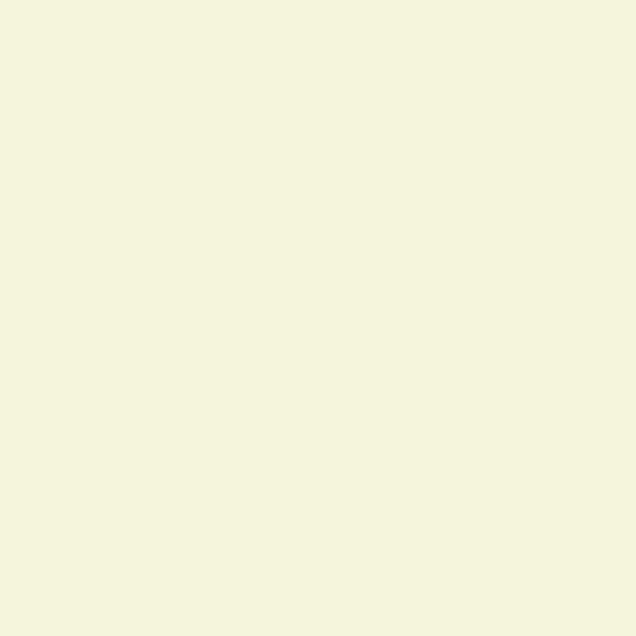

In [80]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'])

for grasp in grasps :
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    mcts.rearr_action.scene_mngr.render_axis(ax, grasp)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

In [97]:
# in pc_utils
pc, pc_segments, pc_color, count = pc_utils.get_obj_point_clouds(
                            rearrangement1.init_scene,
                            mcts.rearr_action.scene_mngr.scene,
                            mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
                            )
# in pc_utils
table_point_cloud, table_color =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)

# in pc_utils
all_pc = np.vstack([pc, table_point_cloud])
all_color = np.vstack([pc_color, table_color])

# fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# mcts.rearr_action.scene_mngr.render_objects(ax)
# p_utils.plot_basis(ax)
# mcts.rearr_action.show()

mcts.rearr_action.scene_mngr.scene.objs


{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.39587317 0.03565069 0.83529998]),
 'bottle0': Object(name=bottle0, pos=[0.39408385 0.14586534 0.87365735]),
 'can0': Object(name=can0, pos=[ 0.45938771 -0.22735796  0.85059666]),
 'cereal0': Object(name=cereal0, pos=[ 0.57663268 -0.00691541  0.88526188]),
 'table_next': Object(name=table_next, pos=[-0.09515335 -0.74350695  0.0445    ]),
 'ben_cube0_next': Object(name=ben_cube0_next, pos=[0.39587317 0.03565069 0.83529998]),
 'bottle0_next': Object(name=bottle0_next, pos=[0.29103868 0.07081607 0.87515735]),
 'can0_next': Object(name=can0_next, pos=[ 0.00251095 -0.1747689   0.85209666]),
 'cereal0_next': Object(name=cereal0_next, pos=[ 0.25196105 -0.16400081  0.88676188])}

In [98]:
current_node['action']['grasp_poses'] = grasps

In [100]:
# fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# # mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'])

# # for grasps in pred_grasps_world_augment[obj_to_manipulate] :
# #     mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, grasps)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
# mcts.rearr_action.scene_mngr.render_objects(ax)
# p_utils.plot_basis(ax)
# mcts.rearr_action.show()

In [101]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

# table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)
# all_pc = np.vstack([combined_pc, table_point_cloud])

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# print(obj_to_manipulate)
# print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])

#################### 
# 포인트 클라우드를 렌더링
colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)
pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
scene = trimesh.Scene(pc_full)

# Set point size and color
scene.point_size = 5.0  # Increase point size to make them more visible

# Show the scene
scene.show()

In [102]:
pc_full[0]

TrackedArray([0.38159215, 0.06317399, 0.81339228])

# Change Point clouds from world coord to camera coord

In [103]:
pc_segments

{'ben_cube0': array([[0.38159215, 0.06317399, 0.8133923 ],
        [0.40184328, 0.05867061, 0.8603    ],
        [0.39703065, 0.00718993, 0.84520406],
        ...,
        [0.40908197, 0.02117631, 0.8103    ],
        [0.428692  , 0.04562311, 0.8376622 ],
        [0.42877138, 0.04578358, 0.8473985 ]], dtype=float32)}

In [ ]:
T_cam = T_cam = np.array(
                [
                    [6.12323400e-17, -8.66025404e-01, 5.00000000e-01, 1.60000008e-01],
                    [1.00000000e00, 5.30287619e-17, -3.06161700e-17, 6.34369494e-01],
                    [-0.00000000e00, 5.00000000e-01, 8.66025404e-01, 1.43132538e00],
                    [0.00000000e00, 0.00000000e00, 0.00000000e00, 1.00000000e00],
                ]
            )

In [96]:
from pykin.utils.transform_utils import get_inverse_homogeneous

# # in pytamp 
# T_cam = np.array([[ 6.12323400e-17, -8.66025404e-01,  5.00000000e-01,
#          1.60000008e-01],
#        [ 1.00000000e+00,  5.30287619e-17, -3.06161700e-17,
#          6.34369494e-01],
#        [-0.00000000e+00,  5.00000000e-01,  8.66025404e-01,
#          1.63132538e+00],
#        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
#          1.00000000e+00]])

# w_T_cam = rearrangement1.table_pose.h_mat @ T_cam 
# w_T_cam = w_T_cam.dot(
#             trimesh.transformations.euler_matrix(np.pi, 0, 0)
#         )

# cam_T_w = get_inverse_homogeneous(w_T_cam)
# ones_arr = np.full((len(all_pc), 1), 1)
# w_pc = np.hstack((all_pc, ones_arr))

# cam_pc =  np.dot(cam_T_w, w_pc.T).T

# # next_pc_segment도 변경해줘 
# ones_arr = np.full((len(pc_segments[obj_to_manipulate]), 1), 1)
# w_pc = np.hstack((pc_segments[obj_to_manipulate], ones_arr))

# pc_segments[obj_to_manipulate] =  np.dot(cam_T_w, w_pc.T).T
cam_pc, pc_segments = mcts.grasp_generator.get_pc_from_camera_point_of_view(all_pc, pc_segments, obj_to_manipulate)


ValueError: shapes (4,4) and (5,3000) not aligned: 4 (dim 1) != 5 (dim 0)

## Manipulation 하고싶은 object에 대해서만 Cube 생성함. 

In [95]:
import numpy as np
import trimesh

# pc_regions, _ = gg.grasp_estimator.extract_3d_cam_boxes(cam_pc[:,:3], pc_segments, min_size=0.4)
# pc_region_1 = pc_regions[obj_to_manipulate]

############
pc_region_1= mcts.grasp_generator.get_region_to_manipulate(cam_pc[:,:3], pc_segments, min_size=0.4, obj_name=obj_to_manipulate)

colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)

# Home
rand_xy = np.random.random((100,3))/100
# z = np.ones((10,1))*0.8
# rand_xy = np.hstack([rand_xy,z])
pc_region_test = trimesh.points.PointCloud(np.vstack([pc_region_1, rand_xy]),  colors=colors)

scene = trimesh.Scene(pc_region_test)

# print(pc_regions[obj_to_manipulate].shape, obj_to_manipulate)
scene.point_size=2.0
scene.show()


Extracted Region Cube Size:  0.4


In [67]:
# all_pc = cam_pc[:,:3]
# print(all_pc.shape, pc_regions[obj_to_manipulate].shape, obj_to_manipulate)

pred_grasps_cam, scores, contact_pts, gripper_openings = {}, {}, {}, {}

pred_grasps_cam, scores, contact_pts, gripper_openings = mcts.grasp_generator.generate_grasp(pc_region_1, pc_segments[obj_to_manipulate], obj_to_manipulate)

NameError: name 'pc_region_1' is not defined

# generate grasp on obj_to_manipulation

In [25]:
# forward_passes = 1
# filter_grasps = True 
# local_regions = True 
# # for name_ in pc_segments.keys():
# #     pred_grasps_cam[name_], scores[name_], contact_pts[name_], gripper_openings[name_] = gg.grasp_estimator.predict_grasps(gg.sess, pc_regions[obj_to_manipulate], convert_cam_coords=True, forward_passes=forward_passes)

# pred_grasps_cam[obj_to_manipulate], scores[obj_to_manipulate], contact_pts[obj_to_manipulate], gripper_openings[obj_to_manipulate] = gg.grasp_estimator.predict_grasps(gg.sess, pc_regions[obj_to_manipulate], convert_cam_coords=True, forward_passes=forward_passes)

# filter grasps

In [26]:
# segment_keys = contact_pts.keys()
# print(contact_pts[obj_to_manipulate].shape)
# for k in segment_keys:
#     if np.any(pc_regions[k]) and np.any(contact_pts[k]):
#         segment_idcs = gg.grasp_estimator.filter_segment(contact_pts[k], pc_segments[k], thres=0.005)
        
#         pred_grasps_cam[k] = pred_grasps_cam[k][segment_idcs]
#         scores[k] = scores[k][segment_idcs]
#         contact_pts[k] = contact_pts[k][segment_idcs]        
#         try:
#             gripper_openings[k] = gripper_openings[k][segment_idcs]
#         except:
#             print('skipped gripper openings {}'.format(gripper_openings[k]))
#         if local_regions and np.any(pred_grasps_cam[k]):
#             print('Generated {} grasps for object {}'.format(len(pred_grasps_cam[k]), k))            
#     else:
#         print('skipping obj {} since  np.any(pc_segments[k]) {} and np.any(contact_pts[j]) is {}'.format(k, np.any(pc_regions[k]), np.any(contact_pts[j])))
        
        


In [27]:
# test_ = {}
# test_score = {}
# idx = np.where(scores[obj_to_manipulate]>0.3)
# test_[obj_to_manipulate] = pred_grasps_cam[obj_to_manipulate][idx]
# test_score[obj_to_manipulate] = scores[obj_to_manipulate][idx]

In [66]:
visualize_grasps(
            cam_pc, pred_grasps_cam, scores, plot_opencv_cam=True, pc_colors=all_color
        )
# visualize_grasps(
#             all_pc, test_, test_score, plot_opencv_cam=True, pc_colors=all_color
#         )

NameError: name 'pred_grasps_cam' is not defined

# Change camera coord to world coord 

생성된 grasp은 camera coord 기준으로 생성되어 있음. 즉, cam_T_g

이를 world coord 기준으로 바꿔야함. -> w_T_cam * cam_T_g

In [29]:
# from pytamp.utils.heuristic_utils import get_heuristic_eef_pose

# def collision_check_using_contact_graspnet(pred_grasps):
#     collision_free_grasps = []
#     for grasps in pred_grasps:
#         mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
#         if not mcts.rearr_action._collide(is_only_gripper=True):
#             collision_free_grasps.append(grasps)
     
#     return np.array(collision_free_grasps)


# pred_grasps_world = {}
# pred_grasps_world_augment = {}
# pred_grasps_cam_augment = {}
# collision_free_grasps = [] 
# # Z축으로 90도 돌려야함. 
# z_90_matrix = np.array([[0,-1,0,0],
#                         [1,0,0,0],
#                         [0,0,1,0],
#                         [0,0,0,1]])

# pred_grasps_cam_augment[obj_to_manipulate] = pred_grasps_cam[obj_to_manipulate] @ z_90_matrix

# # Next scene 기준으로 바꾸긴 했음...!! 
# pred_grasps_world[obj_to_manipulate] = w_T_cam @ pred_grasps_cam[obj_to_manipulate]
# print("Generated Grasp in world coord :", pred_grasps_world[obj_to_manipulate].shape)

# # Collision check using only pred_result not consider augment
# collision_free_grasps = collision_check_using_contact_graspnet(pred_grasps_world[obj_to_manipulate])
# print("Collision free grasps step 1 : ", collision_free_grasps.shape)

# if not len(collision_free_grasps):
#     pred_grasps_world_augment[obj_to_manipulate] = w_T_cam @ pred_grasps_cam_augment[obj_to_manipulate]
#     print("Augment 1 _z axis 90' rotation ", pred_grasps_world_augment[obj_to_manipulate].shape, pred_grasps_world[obj_to_manipulate].shape)
    
#     collision_free_grasps = collision_check_using_contact_graspnet(pred_grasps_world_augment[obj_to_manipulate])
#     print("Collision free grasps step 2 : ", collision_free_grasps.shape)
    
    
# augmented_grasps = []
# if not len(collision_free_grasps):
#     pred_grasps_world_augment[obj_to_manipulate] = np.vstack([pred_grasps_world_augment[obj_to_manipulate], pred_grasps_world[obj_to_manipulate]])
#     for grasps in pred_grasps_world_augment[obj_to_manipulate]:
#         mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
#         tcp_pose = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose()

#         for tcp_pose_ in get_heuristic_eef_pose(tcp_pose):
#             eef_pose_ = mcts.rearr_action.scene_mngr.scene.robot.gripper.compute_eef_pose_from_tcp_pose(tcp_pose_)
#             mcts.rearr_action.scene_mngr.set_gripper_pose(eef_pose_)
#             augmented_grasps.append(eef_pose_)

# if augmented_grasps:
#     augmented_grasps = np.array(augmented_grasps)
#     print("Augment 2 y axis rotation from -pi/3 ~ pi/3 : ", augmented_grasps.shape)
#     pred_grasps_world_augment[obj_to_manipulate] = augmented_grasps
    
#     collision_free_grasps = collision_check_using_contact_graspnet(pred_grasps_world_augment[obj_to_manipulate])
#     print("Collision free grasps step 3 : ", collision_free_grasps.shape)


collision_free_grasps = gg.change_grasp_to_world_coord(pred_grasps_cam, obj_to_manipulate)

Generated Grasp in world coord : (104, 4, 4)
Collision free grasps step 1 :  (33, 4, 4)


In [30]:
collision_free_grasps

array([[[ 0.1180795 , -0.86111401,  0.49450968,  0.86515891],
        [-0.99264354, -0.08893844,  0.08215135, -0.08032895],
        [-0.02676086, -0.50057225, -0.86528098,  1.04037401],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[ 0.81286496,  0.43674668, -0.38536146,  0.95402203],
        [ 0.5492422 , -0.7949807 ,  0.25756234, -0.08984161],
        [-0.19386451, -0.42102016, -0.88609161,  1.05678594],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[ 0.47925575,  0.62974271,  0.61134122,  0.84953485],
        [ 0.87331748, -0.2728391 , -0.40357825, -0.02516633],
        [-0.08735268,  0.72731214, -0.68072505,  1.01809162],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[-0.97852873,  0.17312664,  0.11184223,  0.9045769 ],
        [ 0.19078372,  0.96615183,  0.17364408, -0.08326202],
        [-0.07799418,  0.19125341, -0.97843706,  1.05159154],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],



# Visualize predicted grasps on next_scene 

In [ ]:
# fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# # mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'])

# for grasps in pred_grasps_world_augment[obj_to_manipulate] :
#     mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
# mcts.rearr_action.scene_mngr.render_objects(ax)
# p_utils.plot_basis(ax)
# mcts.rearr_action.show()

# Get Mixed Scene for Collision check 

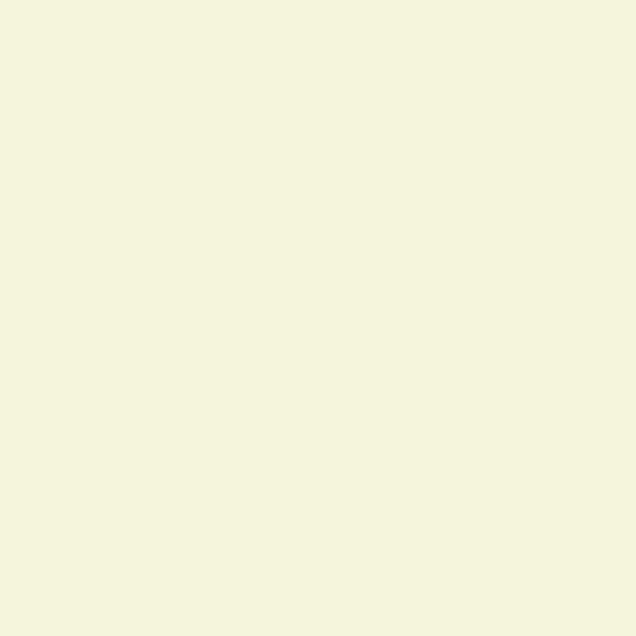

In [31]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
c = 0 
n = 0 

for grasps in collision_free_grasps:
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
    mcts.rearr_action.scene_mngr.render_gripper(ax)
    mcts.rearr_action.scene_mngr.render_axis(ax, grasps)


mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

# print('Not collid : ', len(collision_free_grasps), "Collide :", len(augmented_grasps) - len(collision_free_grasps) )

# Collision check on the synthetic scene

In [54]:
for name in mcts.rearr_action.scene_mngr.scene.objs:
    print(name)


table
ben_cube0
bottle0
can0
cereal0
table_next
ben_cube0_next
bottle0_next
can0_next
cereal0_next


# Remove some objects in synthetic scene

In [55]:
mcts.rearr_action.remove_mixed_scene()

In [56]:
gg.action.remove_mixed_scene()

NameError: name 'gg' is not defined

In [57]:
for i in mcts.rearr_action.scene_mngr.scene.objs:
    print(i)

table
ben_cube0
bottle0
can0
cereal0


In [ ]:
from pykin.utils.transform_utils import get_inverse_homogeneous

T_cam = np.array([[ 6.12323400e-17, -8.66025404e-01,  5.00000000e-01,
         1.60000008e-01],
       [ 1.00000000e+00,  5.30287619e-17, -3.06161700e-17,
         6.34369494e-01],
       [-0.00000000e+00,  5.00000000e-01,  8.66025404e-01,
         1.63132538e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

w_T_cam = rearrangement1.table_pose.h_mat @ T_cam 
w_T_cam = w_T_cam.dot(
            trimesh.transformations.euler_matrix(np.pi, 0, 0)
        )

cam_T_w = get_inverse_homogeneous(w_T_cam)
ones_arr = np.full((len(all_pc), 1), 1)
w_pc = np.hstack((all_pc, ones_arr))

cam_pc =  np.dot(cam_T_w, w_pc.T).T

# next_pc_segment도 변경해줘 
ones_arr = np.full((len(next_pc_segments[obj_to_manipulate]), 1), 1)
w_pc = np.hstack((next_pc_segments[obj_to_manipulate], ones_arr))

next_pc_segments[obj_to_manipulate] =  np.dot(cam_T_w, w_pc.T).T
